In [1]:

with open(r'C:\Users\xavim\Desktop\Uni\3er\2\Syntesis\Project_Synthesis2-\editable_outputs\output_docTR.txt', 'r', encoding = "utf8") as file:
    data = file.readlines()

data

["[(448, 119, 559, 148, 'PREVENCION', 0.9718858003616333, 21), (553, 124, 574, 148, 'Y', 0.8856419324874878, 18), (448, 145, 581, 173, 'READAPTACION', 0.9412999153137207, 21), (448, 173, 513, 196, 'SOCIAL.', 0.7894706726074219, 17), (129, 122, 344, 172, 'SEGURIDAD', 0.9993422627449036, 37), (130, 170, 192, 193, 'SECIANIN', 0.3104821443557739, 17), (137, 179, 202, 203, 'PHDTEECION', 0.5389176607131958, 18), (186, 172, 203, 187, 'DE', 0.98406982421875, 11), (197, 179, 256, 198, 'CIUDADAA', 0.42762088775634766, 14), (200, 169, 259, 187, 'SICURIDAD', 0.41643038392066956, 13), (414, 235, 545, 263, 'SECRETARIA', 0.9940138459205627, 21), (545, 240, 582, 266, 'DE', 0.9849648475646973, 19), (579, 241, 703, 271, 'SEGURIDAD', 0.9987179040908813, 22), (700, 246, 724, 271, 'Y', 0.9930081367492676, 18), (720, 244, 857, 278, 'PROTECCION', 0.9368308186531067, 25), (854, 252, 978, 286, 'CIUDADANA', 0.9984472393989563, 25), (584, 277, 723, 311, 'PREVENCION', 0.707526445388794, 25), (721, 286, 743, 311, 

In [2]:
len(data)

3

In [3]:
# keep only coordinate elements
data.pop(1)

'\n'

In [4]:
data[0]

"[(448, 119, 559, 148, 'PREVENCION', 0.9718858003616333, 21), (553, 124, 574, 148, 'Y', 0.8856419324874878, 18), (448, 145, 581, 173, 'READAPTACION', 0.9412999153137207, 21), (448, 173, 513, 196, 'SOCIAL.', 0.7894706726074219, 17), (129, 122, 344, 172, 'SEGURIDAD', 0.9993422627449036, 37), (130, 170, 192, 193, 'SECIANIN', 0.3104821443557739, 17), (137, 179, 202, 203, 'PHDTEECION', 0.5389176607131958, 18), (186, 172, 203, 187, 'DE', 0.98406982421875, 11), (197, 179, 256, 198, 'CIUDADAA', 0.42762088775634766, 14), (200, 169, 259, 187, 'SICURIDAD', 0.41643038392066956, 13), (414, 235, 545, 263, 'SECRETARIA', 0.9940138459205627, 21), (545, 240, 582, 266, 'DE', 0.9849648475646973, 19), (579, 241, 703, 271, 'SEGURIDAD', 0.9987179040908813, 22), (700, 246, 724, 271, 'Y', 0.9930081367492676, 18), (720, 244, 857, 278, 'PROTECCION', 0.9368308186531067, 25), (854, 252, 978, 286, 'CIUDADANA', 0.9984472393989563, 25), (584, 277, 723, 311, 'PREVENCION', 0.707526445388794, 25), (721, 286, 743, 311, '

In [5]:
#convert to list format
import ast

list1 = ast.literal_eval(data[0] )
list2 = ast.literal_eval(data[1] )

In [6]:
list1[0]

(448, 119, 559, 148, 'PREVENCION', 0.9718858003616333, 21)

In [7]:
from pptx.util import Pt
from pptx import Presentation

def add_text_in_bounding_boxes(presentation, slide_index, text, coordinates):
    slide = presentation.slides[slide_index]
    left, top, width, height = coordinates
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    p = tf.add_paragraph()
    p.text = text
    p.font.size = Pt(10) # size 12 to keep uniformity and avoid text overlaps


In [26]:
prova = [448, 119, 559, 148, 'PREVENCION', 0.9718858003616333, 21]


In [56]:
presentation = Presentation("template.pptx")

coordinates = Pt(prova[0] / 2), Pt(prova[1] / 2), Pt((prova[2] - prova[0]) / 2), Pt((prova[3] - prova[1]) / 2)

add_text_in_bounding_boxes(presentation, 0, prova[4], coordinates)
presentation.save("output.pptx")

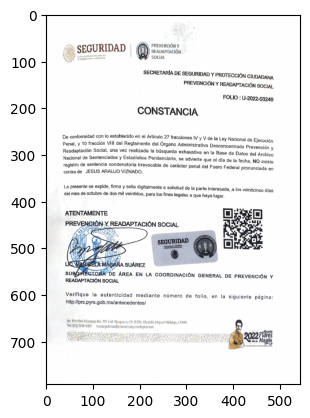

In [8]:
# open an image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(r'C:\Users\xavim\Desktop\Uni\3er\2\Syntesis\Project_Synthesis2-\Sample documents - PNG\Certificates of no criminal records\Constancia de no antecedentes penales federales\0.png')
plt.imshow(img)


In [10]:
width, height = img.size

In [44]:
presentation = Presentation("template.pptx")

# coordinates /2 to fit the template, /2.1 to avoid text overlaps as it starts from higher (ns pq)
for words in list1:
    coordinates = Pt(words[0] / 2), Pt(words[1] / 2.1), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)
    text = words[4]
    add_text_in_bounding_boxes(presentation, 0, text, coordinates)
    
presentation.save("predefined_layout.pptx")

In [11]:
#resizing the slide layout
presentation = Presentation("template.pptx")


pixels_per_inch = 96  # Standard resolution for screens
new_width = int(width * 914400 / pixels_per_inch)
new_height = int(height * 914400 / pixels_per_inch)

# Resize the slide layout
presentation.slide_width = new_width
presentation.slide_height = new_height

# coordinates /2 to fit the template, /2.1 to avoid text overlaps as it starts from higher (ns pq)
for words in list1:
    coordinates = Pt(words[0] / 2.5), Pt(words[1] / 3), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)    
    text = words[4]
    add_text_in_bounding_boxes(presentation, 0, text, coordinates)
    
presentation.save("with_image_layout.pptx")

In [12]:
from pptx.util import Pt
from pptx import Presentation
from pptx.dml.color import RGBColor

def add_text_in_bounding_boxes_colors(presentation, slide_index, text, coordinates, confidence):
    slide = presentation.slides[slide_index]
    left, top, width, height = coordinates
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    p = tf.add_paragraph()
    p.text = text
    p.font.size = Pt(10) # size 12 to keep uniformity and avoid text overlaps
    if confidence > 0.9:
        p.font.color.rgb = RGBColor(0, 255, 0)
    elif confidence > 0.6:
        p.font.color.rgb = RGBColor(255, 165, 0)
    else:
        p.font.color.rgb = RGBColor(255, 0, 0)
    

In [18]:
#resizing the slide layout
presentation = Presentation("template.pptx")


pixels_per_inch = 96  # Standard resolution for screens
new_width = int(width * 914400 / pixels_per_inch)
new_height = int(height * 914400 / pixels_per_inch)

# Resize the slide layout
presentation.slide_width = new_width
presentation.slide_height = new_height

# coordinates /2 to fit the template, /2.1 to avoid text overlaps as it starts from higher (ns pq)
for words in list1:
    coordinates = Pt(words[0] / 2.5), Pt(words[1] / 3), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)    
    text = words[4]
    confidence = words[5]
    add_text_in_bounding_boxes_colors(presentation, 0, text, coordinates, confidence)
    
presentation.save("image_layout_confidence_words.pptx")


def change_text_color(presentation, slide_index, color):
    slide = presentation.slides[slide_index]
    for shape in slide.shapes:
        if not shape.has_text_frame:
            continue
        for paragraph in shape.text_frame.paragraphs:
            for run in paragraph.runs:
                run.font.color.rgb = color


change_text_color(presentation, 0, RGBColor(0, 0, 0))
presentation.save("remove_colors.pptx")